In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in data
df = pd.read_csv('Train.csv')
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [3]:
df.tail()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.7,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,0.001107,833637.575687,-16.856890,54.302954,12.312248,49.871571,0.000044,22073.788216,0.000019,0.174995,227.627879,0.001310,-16.856890,54.302954,12.312248,49.871571,0.039941,148.082862,192.388239,833666.850330,-19.340150,54.377045,6.766655,49.928446,-0.000003,0.001310,-16.856890,54.302954,12.312248,49.871571,0.000024,0.857937,275.606335,98145.783526,0.001238,5.875377,275.606335,98145.783526,-16.856890,54.302954,12.312248,49.871571,0.243682,-1.412609,833637.575687,-16.856890,54.302954,12.312248,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.3,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,0.004726,833603.015554,-52.308049,43.179969,-59.100874,49.360606,0.000038,16689.048841,0.000033,0.157659,227.196630,0.007644,-85.223618,36.170757,-129.236726,49.779531,0.037872,308.441747,61.379434,833169.251333,-96.087323,33.535001,-156.993340,49.949240,-0.000034,0.007644,-85.223618,36.170757,-129.236726,49.779531,-0.000014,0.963129,438.979426,96883.197984,0.007750,5.068010,604.731099,95208.391485,-85.223618,36.170757,-129.236726,49.779531,0.156944,-1.448509,833894.342749,-23.953088,49.391952,1.301716,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.05292,-96.149506,33.230234,-157.067467,49.91231
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.1,68.500000,0.003

In [4]:
df.shape

(30557, 82)

In [5]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [6]:
# check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle


In [7]:
# Check for number of unique elements under each category
df.apply('nunique')

Place_ID X Date                 30557
Date                               94
Place_ID                          340
target                            375
target_min                        269
                                ...  
L3_CH4_aerosol_optical_depth     2874
L3_CH4_sensor_azimuth_angle      2874
L3_CH4_sensor_zenith_angle       2874
L3_CH4_solar_azimuth_angle       2874
L3_CH4_solar_zenith_angle        2874
Length: 82, dtype: int64

In [8]:
# Check for zeros in data
df.isin([0]).sum().sort_values(ascending=False).head(10)

L3_CH4_solar_zenith_angle                        2915
L3_CH4_sensor_zenith_angle                       2915
L3_CH4_sensor_azimuth_angle                      2915
L3_CH4_aerosol_optical_depth                     2915
L3_CH4_aerosol_height                            2915
L3_CH4_CH4_column_volume_mixing_ratio_dry_air    2915
L3_CH4_solar_azimuth_angle                       2915
L3_NO2_cloud_fraction                            2897
L3_NO2_sensor_zenith_angle                       2611
L3_NO2_tropopause_pressure                       2611
dtype: int64

In [9]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_CH4_solar_zenith_angle                          24765
L3_CH4_solar_azimuth_angle                         24765
L3_CH4_sensor_zenith_angle                         24765
L3_CH4_sensor_azimuth_angle                        24765
L3_CH4_aerosol_optical_depth                       24765
L3_CH4_aerosol_height                              24765
L3_CH4_CH4_column_volume_mixing_ratio_dry_air      24765
L3_NO2_tropospheric_NO2_column_number_density       8669
L3_HCHO_tropospheric_HCHO_column_number_density     7425
L3_HCHO_solar_zenith_angle                          7425
dtype: int64


In [10]:
#get rid of all CH4 columns because they don't have that much info - a lot of zeros and NaNs
df = df.drop([ 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1)

In [11]:
# Recheck number of zeros and NaNs
print(df.isin([0]).sum().sort_values(ascending=False).head(10))
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_NO2_cloud_fraction                             2897
L3_NO2_tropopause_pressure                        2611
L3_NO2_sensor_azimuth_angle                       2611
L3_NO2_tropospheric_NO2_column_number_density     2611
L3_NO2_stratospheric_NO2_column_number_density    2611
L3_NO2_solar_zenith_angle                         2611
L3_NO2_solar_azimuth_angle                        2611
L3_NO2_sensor_zenith_angle                        2611
L3_NO2_sensor_altitude                            2611
L3_NO2_absorbing_aerosol_index                    2611
dtype: int64
L3_NO2_tropospheric_NO2_column_number_density          8669
L3_HCHO_tropospheric_HCHO_column_number_density        7425
L3_HCHO_tropospheric_HCHO_column_number_density_amf    7425
L3_HCHO_solar_zenith_angle                             7425
L3_HCHO_solar_azimuth_angle                            7425
L3_HCHO_sensor_zenith_angle                            7425
L3_HCHO_sensor_azimuth_angle                           7425
L3_HCHO_cloud_fra

I will now investigate whether or not the zeros in the data are due to a lack of information or if it actually makes sense for the data to have values of 0. Taking a look at some of the observations with 0 value in L3_NO2_cloud_fraction (the column with the most 0s): 

In [12]:
display(df[df.L3_NO2_cloud_fraction == 0].head(10))

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
86,010Q650 X 2020-03-28,2020-03-28,010Q650,54.0,27.0,76.0,1978.48,83,19.700001,73.000000,0.008420,16.191858,2.627944,-0.196741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113733,231.170874,0.271540,-4.240685,57.759226,-39.590673,48.292916,0.020893,1352.145788,1396.235912,839787.115499,75.284695,51.401343,-27.242068,42.298248,0.000066,0.269066,-4.239497,57.758086,-39.590454,48.290744,0.000143,0.519249,4889.302151,57160.511136,0.275129,10.183423,5889.302189,50234.682138,-4.240685,57.759226,-39.590673,48.292916,0.250742,-0.835711,840756.717048,-4.240685,57.759226,-39.590673,48.292916,0.000137,0.310367,-0.000029,-1.251251,0.271540,-4.240685,57.759226,-39.590673,48.292916
87,010Q650 X 2020-03-29,2020-03-29,010Q650,50.0,31.0,67.0,977.09,92,20.400000,57.200001,0.006760,16.571649,1.681426,0.674067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113769,230.689257,0.128049,-13.681473,59.674360,-35.610490,47.173387,0.019910,959.620819,100.895999,839862.618281,31.127966,62.309884,-28.063348,44.194501,0.000063,0.128049,-13.681473,59.674360,-35.610490,47.173387,0.000164,0.706256,1374.645718,87108.965295,0.125783,4.656796,1876.521387,82731.839780,-13.681473,59.674360,-35.610490,47.173387,0.220840,-0.952558,840483.641615,-13.681473,59.674360,-35.610490,47.173387,-0.000305,0.438089,-0.000129,-1.371859,0.128049,-13.681473,59.674360,-35.610490,47.173387
88,010Q650 X 2020-03-30,2020-03-30,010Q650,29.0,19.0,55.0,1106.75,95,11.200000,33.200001,0.004140,17.455774,1.201460,3.086216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111579,231.350736,0.082988,-104.557370,37.290817,-45.749798,50.692152,0.021679,609.429284,525.870655,841101.387949,-102.571374,37.372516,-45.764283,50.700694,0.000014,0.082988,-104.557370,37.290817,-45.749798,50.692152,0.000103,0.546205,2707.481437,73948.463956,0.083122,4.455179,3707.481433,65404.090844,-104.557370,37.290817,-45.749798,50.692152,0.234848,-1.033

It looks like there is a consistent theme for the data above: the NO2 data is all 0s or missing entirely. Doing a little research into what each of the terms mean, columns such as the one representing tropospheric pressure cannot be zero and it is highly unlikely for column density to be 0 (pretty much impossible). I think 0s represent misising information and therefore need to find a way to replace this information. 

In [13]:
temp = df[['Place_ID X Date','Date','Place_ID']]

In [14]:
df.replace(0, np.nan, inplace=True)

In [15]:
df = df.groupby("Place_ID").transform(lambda x: x.fillna(x.mean()))

In [16]:
df = pd.concat([temp, df], axis=1)

In [17]:
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.132903,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.094147,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2525.715722,77363.017931,0.133808,6.580471,3186.325096,72204.276756,76.536426,38.593017,-61.752587,22.363665,0.252417,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.100892,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319.860448,-103.494458,49.924556,-78.355069

In [18]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_NO2_cloud_fraction                             7
L3_NO2_sensor_altitude                            7
L3_NO2_absorbing_aerosol_index                    7
L3_NO2_NO2_slant_column_number_density            7
L3_NO2_NO2_column_number_density                  7
L3_NO2_sensor_azimuth_angle                       7
L3_NO2_sensor_zenith_angle                        7
L3_NO2_solar_azimuth_angle                        7
L3_NO2_solar_zenith_angle                         7
L3_NO2_stratospheric_NO2_column_number_density    7
dtype: int64


Looks like there are still null values. This is probably because information for some features in some locations were completely null. Let's see where these values are:

In [19]:
temp = df[df.isna().any(axis=1)]
temp

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
5501,5IUK9TG X 2020-01-04,2020-01-04,5IUK9TG,30.0,10.0,58.0,1571.11,23,15.960001,92.450000,0.005199,5.522028,6.213727,0.550559,0.000077,0.000162,-0.971421,0.025913,834858.551217,-3.065661,48.448596,-138.231145,76.453508,0.000021,14429.524303,0.000057,0.153997,219.975701,0.969658,67.663652,23.526617,-175.281563,75.313012,0.032338,298.192347,4795.556661,834957.072159,64.931746,22.714704,-175.097355,75.350119,0.000088,0.297486,-13.535737,49.565987,-146.163239,76.677583,0.000132,0.682464,3778.270882,63940.403490,0.967053,116.411532,4778.270856,55884.393065,67.663652,23.526617,-175.281563,75.313012,0.448313,-1.451496,834931.677594,67.663652,23.526617,-175.281563,75.313012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5502,5IUK9TG X 2020-01-05,2020-01-05,5IUK9TG,32.0,8.0,155.0,23467.80,24,5.011948,69.380000,0.002896,1.419879,4.695001,-4.546532,0.000077,0.000162,-0.971421,0.025913,834858.551217,-3.065661,48.448596,-138.231145,76.453508,0.000021,14429.524303,0.000057,0.142262,219.020933,0.296904,-13.536781,49.577005,-145.524316,76.672692,0.035509,358.538147,83.513826,835230.276053,60.515776,41.119151,-154.224771,75.085294,0.000088,0.297486,-13.535737,49.565987,-146.163239,76.677583,0.000132,0.682464,1398.153464,86719.138512,0.279829,2.153773,2342.935764,77071.156407,-13.536781,49.577005,-145.524316,76.672692,0.189837,-0.945495,834805.506485,-13.536781,49.577005,-145.524316,76.672692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,5IUK9TG X 2020-01-06,2020-01-06,5IUK9TG,52.0,40.0,73.0,909.33,10,11.480000,87.980001,0.003243,-0.163708,2.542787,2.670559,0.000077,0.000162,-0.971421,0.025913,834858.551217,-3.065661,48.448596,-138.231145,76.453508,0.000021,14429.524303,0.000057,0.143561,220.889840,0.976294,-18.484758,49.759675,7.469811,76.066018,0.034484,484.850033,284.219782,834581.493318,-79.173003,46.775302,-130.205492,76.879785,0.000088,0.297486,-13.535737,49.565987,-146.163239,76.677583,0.000132,0.

In [20]:
# Checkout data in the general region
df.iloc[5498:5508]

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
5498,5IOL334 X 2020-04-02,2020-04-02,5IOL334,137.0,89.0,234.0,5910.39,209,5.503974,26.566667,0.001687,7.064233,5.622730,3.017696,0.000141,0.000298,-0.892459,0.206615,832940.020067,-4.608258,33.951443,-117.114959,57.117105,0.000039,21888.996116,0.000101,0.188727,229.436232,0.155826,-97.970436,34.522205,-150.736039,42.349021,0.047752,430.945533,3202.480746,832704.876591,-95.851924,34.579048,-150.724590,42.353869,0.000186,0.155826,-97.970436,34.522205,-150.736039,42.349021,0.000298,0.745542,2687.527085,74419.750614,0.158570,5.898845,3456.683784,67995.317214,-97.970436,34.522205,-150.736039,42.349021,0.163988,-0.804936,832670.599826,-97.970436,34.522205,-150.736039,42.349021,0.000061,0.262520,0.000007,-1.196719,0.155826,-97.970436,34.522205,-150.736039,42.349021
5499,5IOL334 X 2020-04-03,2020-04-03,5IOL334,152.0,34.0,289.0,20185.26,216,5.833333,34.200001,0.002360,8.212539,5.892774,3.108384,0.000141,0.000298,-0.892459,0.206615,832940.020067,-4.608258,33.951443,-117.114959,57.117105,0.000039,21888.996116,0.000101,0.179155,227.903423,0.483560,-9.789076,34.569867,-118.244418,56.499218,0.044608,242.156093,1192.352418,832887.808515,-20.432456,33.557241,-139.086815,57.199386,0.000061,0.302559,-19.196027,33.271046,-134.453879,56.832221,0.000093,1.109741,2821.097358,71116.468917,0.907042,16.226224,3821.097374,62280.057736,-103.325124,9.269690,-157.190170,40.518899,0.148038,-1.728682,832754.803966,-103.325124,9.269690,-157.190170,40.518899,0.000192,0.434576,0.000068,-1.690187,0.329651,-22.458534,33.025659,-133.794471,56.504749
5500,5IOL334 X 2020-04-04,2020-04-04,5IOL334,127.0,46.0,665.0,117570.70,216,2.033333,30.133333,0.001073,-0.935960,1.965432,-9.061172,0.000141,0.000298,-0.892459,0.206615,832940.020067,-4.608258,33.951443,-117.114959,57.117105,0.000039,21888.996116,0.000101,0.179155,227.903423,0.483560,-9.789076,34.569867,-118.244418,56.499218,0.044608,242.156093,1192.352418,83288

Looks like my hypothesis was correct: there is no SO2 data in location 5IUK9TG. I will assume the same issue for rows 20390 to 20396. I don't see a good way to deal with this, so I'll drop these rows.

In [21]:
df = df.dropna(how='any')

In [22]:
temp = df[df.isna().any(axis=1)]
temp

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle


As we can see, there are no more null values. 

In [23]:
# Check datatypes of each row
df.dtypes

Place_ID X Date                 object
Date                            object
Place_ID                        object
target                         float64
target_min                     float64
                                ...   
L3_SO2_cloud_fraction          float64
L3_SO2_sensor_azimuth_angle    float64
L3_SO2_sensor_zenith_angle     float64
L3_SO2_solar_azimuth_angle     float64
L3_SO2_solar_zenith_angle      float64
Length: 75, dtype: object

In [24]:
# The datatype of date column is currently object. Converting to datetime:
df['Date'] = df['Date'].astype('datetime64')

Since there are too many columns to check the datatypes of, I will check to see if there are any categorical variables that need to be converted into numerical variables that can be used during modelling.

In [25]:
df.select_dtypes(exclude=['float64'])

,Place_ID X Date,Date,Place_ID,target_count
0,010Q650 X 2020-01-02,2020-01-02,010Q650,92
1,010Q650 X 2020-01-03,2020-01-03,010Q650,91
2,010Q650 X 2020-01-04,2020-01-04,010Q650,96
3,010Q650 X 2020-01-05,2020-01-05,010Q650,96
4,010Q650 X 2020-01-06,2020-01-06,010Q650,95
...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,72
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,72
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,72
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,72


Looks like Place_ID is the only relevant column. However, I have noticed that the locations in the testing set are different from those in the training set.

In [26]:
df.Place_ID.unique()

array(['010Q650', '05EC30X', '0DPWHX8', '0GBXTHY', '0HYPV1N', '0I2XREH',
       '0KV6RJ1', '0MGEY68', '0O9R6AD', '0PP73FZ', '0RYZQUU', '0TFOCOS',
       '0TLH9UN', '11WPGRD', '168B2T2', '1GZGJPN', '1LC5FAK', '1PRBF5P',
       '1RYCZPT', '1SC5AWD', '1SKLTGJ', '1TE1HKJ', '1UEYEJQ', '1VN0K1S',
       '1WD100Y', '1X421B8', '1Y0S7TZ', '1YXF6T3', '1Z0FIHB', '1ZBVIMD',
       '215BUAP', '22D7H7I', '238N4KU', '28OSFYU', '2JZW8ZM', '2OR3E6X',
       '2S8UY1N', '2T41T7C', '2USU80I', '2WABRKJ', '35YN53B', '37VXILV',
       '3EJ33BJ', '3H1DEPM', '3HTVI1M', '3MXSVYJ', '3V177MC', '3WZQJU8',
       '4085G7L', '426FKUG', '431JQGO', '4EVR9T8', '4IVJPF2', '4WA4C0T',
       '4XP6UOX', '4ZMC9UQ', '50JFNAG', '57GIW0H', '5ETAG9S', '5I4TI4R',
       '5IOL334', '5KE9R9R', '5M7ZX94', '5QYHA81', '5SXR1G0', '5YBO7PQ',
       '62HOUYZ', '693EWQR', '6CR3BYP', '6HXPCBH', '6J4AKCJ', '6KAHP8X',
       '6KHIOQ8', '6O56XQX', '6PWJJ6D', '6SJG8N2', '6TF1KNR', '6TLEFED',
       '6U70TX5', '73GXFXK', '7DRFQCK', '7LG0EUH', 

I am unsure of the location labelling convention, but it looks like the locations can be categorized by the first letter of its place id. Let's create a column in the dataframe that represents this.

In [27]:
df['Place_ID_Group'] = df.Place_ID.str[0]

In [28]:
place_id_unique = df.Place_ID_Group.unique()

In [29]:
id_dict = {}
values = range(0,35)
keys = place_id_unique

key_values = zip(keys, values)
for key, value in key_values:
    id_dict[key] = value

id_dict['Z'] = 35
print(id_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35}


In [30]:
df = df.replace({"Place_ID_Group": id_dict})
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Place_ID_Group
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.132903,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.094147,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2525.715722,77363.017931,0.133808,6.580471,3186.325096,72204.276756,76.536426,38.593017,-61.752587,22.363665,0.252417,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.100892,76.536426,38.593017,-61.752587,22.363665,0
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,0
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319.860448,-103.494458,4

Add column to represent frequency of each location

In [31]:
import category_encoders as ce

In [32]:
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df['Place_ID'])
df = df.join(count_encoded.add_suffix("_count"))
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Place_ID_Group,Place_ID_count
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.132903,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.094147,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2525.715722,77363.017931,0.133808,6.580471,3186.325096,72204.276756,76.536426,38.593017,-61.752587,22.363665,0.252417,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.100892,76.536426,38.593017,-61.752587,22.363665,0,94
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,0,94
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319

Let's process the date column. Since all the data was captured in 2020, the year value is not of much use to us. Let's create month and day columns, as well as columns representing the day of the week and whether or not the day is a weekend.

In [33]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dow'] = df['Date'].apply(lambda x: x.weekday())

In [34]:
df['is_wknd'] = df['dow'].apply(lambda x: 1 if x >= 5 else 0)

Reorder columns to group relevant columns together

In [35]:
# Reorder columns so month and day are after target_count
cols = df.columns.tolist()
cols = cols[:8] + cols[-6:] + cols[8:-6]

In [36]:
cols

['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'Place_ID_Group',
 'Place_ID_count',
 'month',
 'day',
 'dow',
 'is_wknd',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_a

In [37]:
df = df[cols]
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,Place_ID_Group,Place_ID_count,month,day,dow,is_wknd,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,0,94,1,2,3,0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.132903,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.094147,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2525.715722,77363.017931,0.133808,6.580471,3186.325096,72204.276756,76.536426,38.593017,-61.752587,22.363665,0.252417,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.100892,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,0,94,1,3,4,0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,0,94,1,4,5,1,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.3427

Remove all outliers

In [38]:
df = df.reset_index(drop=True)

In [39]:
outlier_cols = cols.copy()
outlier_cols = outlier_cols[6:]

In [40]:
# Code credit: https://stackoverflow.com/questions/50397250/pandas-group-by-remove-outliers/54356494
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

for outlier_col in outlier_cols:
    df = df[~df.groupby('Place_ID')[outlier_col].apply(is_outlier)]

df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,Place_ID_Group,Place_ID_count,month,day,dow,is_wknd,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,0,94,1,2,3,0,11.000000,60.200001,0.008040,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.132903,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.094147,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2525.715722,77363.017931,0.133808,6.580471,3186.325096,72204.276756,76.536426,38.593017,-61.752587,22.363665,0.252417,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.100892,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,0,94,1,3,4,0,14.600000,48.799999,0.008390,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,0,94,1,7,1,0,14.600000,42.200001,0.005862,19.174890,2.955603,0.969075,0.000069,0.000146,-0.725329,0.070249,840356.873809,76.387678,30.606610,-62.133340,23.419985,0.000057,11205.115564,0.000012,0.126138,232.527580,0.063836,76.387658,30.605176,-62.134

Looking at the data again, it appears as though the data can be broken down into mutually exclusive groups (data about NO2, data about aerosol, etc.) I think it would be useful to explore correlations between the target variable and each group of data.

In [41]:
target_variables = df.loc[:,'target']
feature_engineering = df.loc[:,'Place_ID_Group':'is_wknd']
general = df.loc[:,'precipitable_water_entire_atmosphere':'v_component_of_wind_10m_above_ground']
no2 = df.loc[:,'L3_NO2_NO2_column_number_density':'L3_NO2_tropospheric_NO2_column_number_density']
o3 = df.loc[:,'L3_O3_O3_column_number_density':'L3_O3_solar_zenith_angle']
co = df.loc[:,'L3_CO_CO_column_number_density':'L3_CO_solar_zenith_angle']
hcho = df.loc[:,'L3_HCHO_HCHO_slant_column_number_density':'L3_HCHO_tropospheric_HCHO_column_number_density_amf']
cloud = df.loc[:,'L3_CLOUD_cloud_base_height':'L3_CLOUD_surface_albedo']
aer = df.loc[:,'L3_AER_AI_absorbing_aerosol_index':'L3_AER_AI_solar_zenith_angle']
so2 = df.loc[:,'L3_SO2_SO2_column_number_density':'L3_SO2_solar_zenith_angle']
groups = [feature_engineering, general, no2, o3, co, hcho, cloud, aer, so2]

In [42]:
from ipywidgets import interact, fixed

In [43]:
#Create our plotting function
def plot_heatmap(df1, df2, num):
    plt.figure(figsize=(20,10))
    temp = pd.concat([df1, df2[num]], axis=1)
    corrmat = temp.corr()
    corr = sns.heatmap(corrmat, cmap='coolwarm', annot=True,vmin=-1, vmax=1)

In [44]:
interact(plot_heatmap, df1=fixed(target_variables), df2=fixed(groups), 
         num=[('feature_engineering',0),('general',1),('no2',2),('o3',3),
              ('co',4),('hcho',5),('cloud',6),('aer',7),('so2',8)]);

interactive(children=(Dropdown(description='num', options=(('feature_engineering', 0), ('general', 1), ('no2',…

### Summary of heatmaps
In all the heatmaps above, I am most interested in the top right and bottom left corners (that is, how the predictors are correlated to each of the target varaiables). I am also looking for correlations between the predictors to ensure collinearity of data. Some observations:

#### Engineered Features
- The month is a good predictor of the target value. 
- The day of the week does not have a large impact on the target value.


#### General
- The predictor with the strongest correlation to the target variable is the u component of wind 10m above ground (u component direction: East).
- Precipitable water, specific humidity, and temperature are strongly positively intercorrelated. Doing some research, this makes sense because humidity refers to the amount of water vapor in the local atmosphere, while precipitable water is defined as the amount of moisture in a column of the atmosphere. As such, humidity can be understood as a part of the precipitable water measurement. Higher temperatures are conducive to higher levels of humidity and precipitable water (because more water vapor is needed to reach saturation).
    - Maybe only one of these variables are needed. Since temperature is the strongest predictor of the target variable, that is the variable that we'll keep if I decide to drop variables.
    
#### NO2
- The predictor with the strongest correlation to the target variable is the sensor altitude.
- column density, tropospheric column density, and slant column density are strongly positively correlated. Surprisingly, these variables are not strongly linked to stratospheric column density, which suggests to me that the amount of NO2 in the stratosphere is insignificant relative to the amount of NO2 in the troposphere. Since slant column density is the best predictor of the target variable out of the 3 correlated variables, I can drop the other 2 variables.
- The azimuth and zenith angles of the sensor are less correlated to the target variable than the solar azimuth and zenith angles.
    - This, combined with the first observation, tells me that only the altitude of the sensor is important, not the position (ie. the sensor can be positioned anywhere on the plane at a predetermined altitude).
- Cloud fraction and the target variable are inversely correlated, which makes sense because clouds could have ["shielding, albedo, and in-cloud absorption effects on trace gas retrievals"](https://www.researchgate.net/publication/252884476_Impact_of_Effective_Cloud_Fraction_Assumption_on_Tropospheric_NO2_Retrievals)
- The solar zenith angle matters more than the solar azimuth angle and is a relatively strong predictor of the target variable, meaning that the altitude of the sun (and my extension, the strength of the sun), is a key factor.

#### O3
- The predictor with the strongest correlation is the solar azimuth angle, suggesting the distance (strength) of the sun has a large impact on levels of O3 which in turn impacts the target value. 
- The solar zenith angle, column density, and effective temperature are all intercorrelated. It appears that higher temperatures decrease column density. Thus, when the sun is closest to the middle of the sky (when the solar zenith angle is at minimum and the temperature is maximum) the column desntiy decreases.
    - Since all three variables are correlated, we could possibly drop the one with the lowest impact on the target value, the solar zenith angle.

#### CO
- The strongest predictor is the column density. The two variables are positively correlated, suggesting that higher levels of CO lead to higher levels of the target variable.
- Column density is inversely correlated with sensor altitude, suggesting that CO is more abundant at lower altitudes.

#### HCHO
- The strongest predictor is the tropospheric column density. Slant column density is a close second, suggesting that the levels of HCHO (specifically, the levels of HCHO at lower altitudes in the troposphere) are a strong predictor of the target variable.
    - The more HCHO, the higher the target variable.
    - The two variables (tropospheric column density and slant column density) are very strongly correlated, suggesting that a majority of HCHO particles are in the troposphere.

#### Cloud
- The strongest predictor is the solar azimuth angle, which is independent of all the cloud variables. This suggests that cloud formation as a whole does not have a significant impact on the target variable.
- 4 variables are very closely correlated: cloud base pressure, cloud base height, cloud top height, and cloud top pressure.
- Since none of the cloud variables are strong predictors of the target variables, I will drop them if I choose to drop variables.

#### Aerosol
- The strongest predictor is the sensor altitude, which is positively correlated with the absorbing aerosol index, the only aerosol specific measurement. 
- It is interesting that while absorbing aerosol index and sensor altitude are positively correlated, and absorbing aerosol index is positively correlated with the target variable, the sensor altitiude is inversely correlated with the target variable.
- The magnitude of correlation between the target variable and absorbing aerosol index is very small, indicating that aerosol levels do not have a large impact on the target variable. 

#### SO2
- The strongest predictor is the solar azimuth angle.
- Neither slant column density nor column density have a strong impact on the target variable, suggesting that the levels of SO2 are not of significance to this problem.

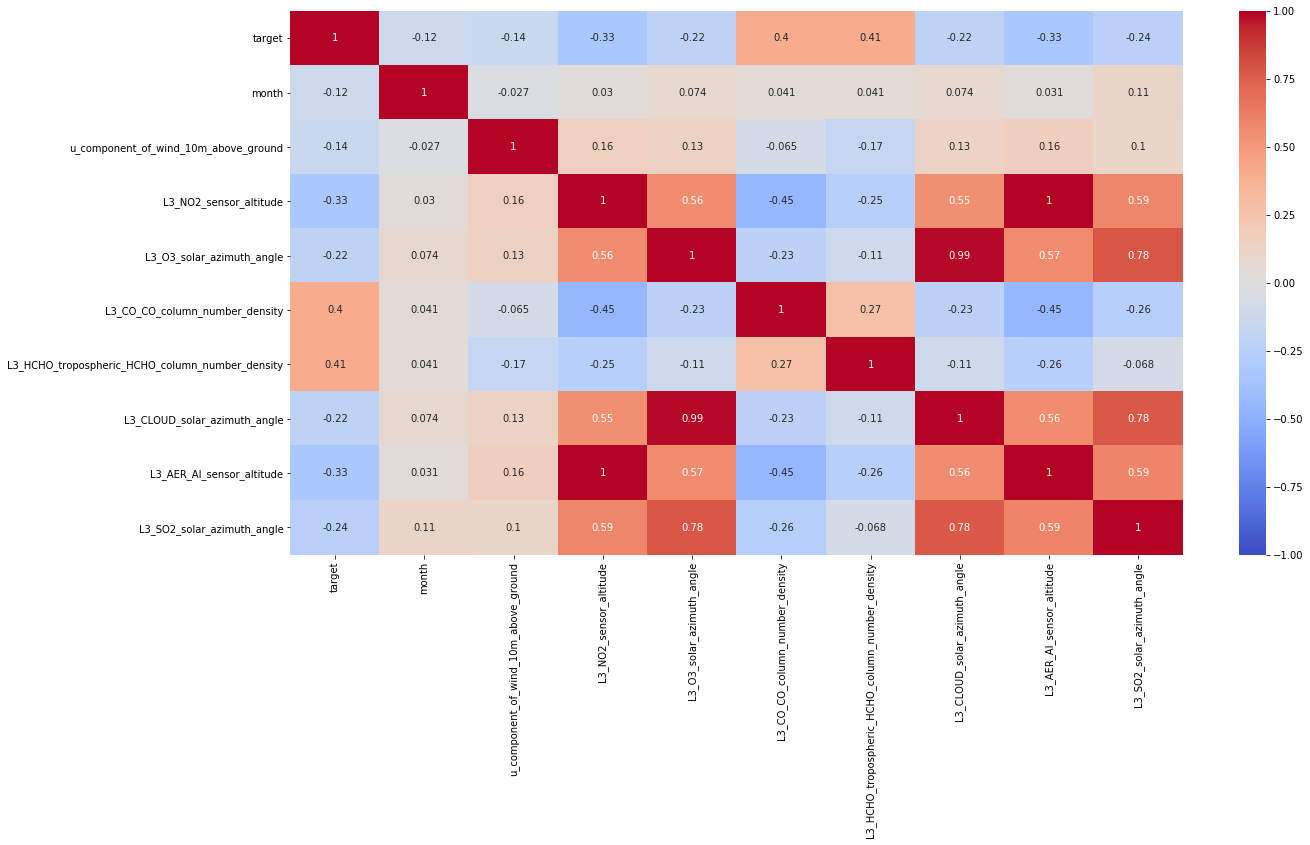

In [45]:
# Compare best predictors of each category
best_predictors = ['target','month','u_component_of_wind_10m_above_ground','L3_NO2_sensor_altitude','L3_O3_solar_azimuth_angle',
                  'L3_CO_CO_column_number_density','L3_HCHO_tropospheric_HCHO_column_number_density',
                   'L3_CLOUD_solar_azimuth_angle','L3_AER_AI_sensor_altitude','L3_SO2_solar_azimuth_angle']
plt.figure(figsize=(20,10))
best = df[best_predictors]
corrmat = best.corr()
corr = sns.heatmap(corrmat, cmap='coolwarm', annot=True,vmin=-1, vmax=1)
    

From the correlation matrix, we can see that the sensor altitudes across groups are highly correlated (assume that is the case for the rest of the groups, reasonable to assume that all sensors are placed at the same altitude, or that one sensor was used and could measure all the gases). Furtheremore, the solar azimuth angles are also highly correlated. We can assume that the measurements were taken at the same (very similar) time of the day, and thus only one of these measurements is needed. This logic carries over to the solar zenith angle as well as the sensor solar and zenith angles.

Let's take a look at the distributions of these strong predictors.

In [46]:
df.describe()

,target,target_min,target_max,target_variance,target_count,Place_ID_Group,Place_ID_count,month,day,dow,is_wknd,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
count,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,2.034300e+04,20343.000000,20343.000000,20343.000000,20343.000000
mean,60.883513,29.121983,115.429420,6.900012e+03,124.330630,16.472595,91.453375,2.110112,15.254928,3.062970,0.290960,15.158325,69.968028,0.006078,9.603288,0.401778,0.052763,0.000100,0.000177,-1.246255,2.811017e-01,832508.236890,-12.292279,34.772232,-128.661400,48.790750,0.000035,14644.447728,0.000060,0.141886,227.334315,4.066222e-01,-11.906950,35.192415,-126.175015,48.263475,0.036621,970.930201,1342.492113,832518.965728,-13.483120,34.305595,-131.913918,48.050128,0.000042,1.982479e-01,-14.495250,35.090170,-129.274086,47.777493,0.000085,1.085925,2280.039381,79246.980123,4.094303e-01,15.330284,3030.352894,72648.124752,-11.924274,35.171245,-126.025351,48.005516,0.224509,-1.212931,832521.690871,-11.549355,35.274924,-125.531939,48.064609,0.000112,0.429864,0.000031,-2.011813,2.111250e-01,-14.110637,34.806801,-129.994576,47.677005
std,45.583496,32.395509,92.

In [47]:
# Define function to draw histograms
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, variable in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[variable].hist(ax=ax)
        ax.set_title(variable)
        plt.ylabel('target')
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,0,12000))
    fig.tight_layout()
    plt.show()

In [48]:
predictors = best_predictors.copy()
predictors.remove('target')

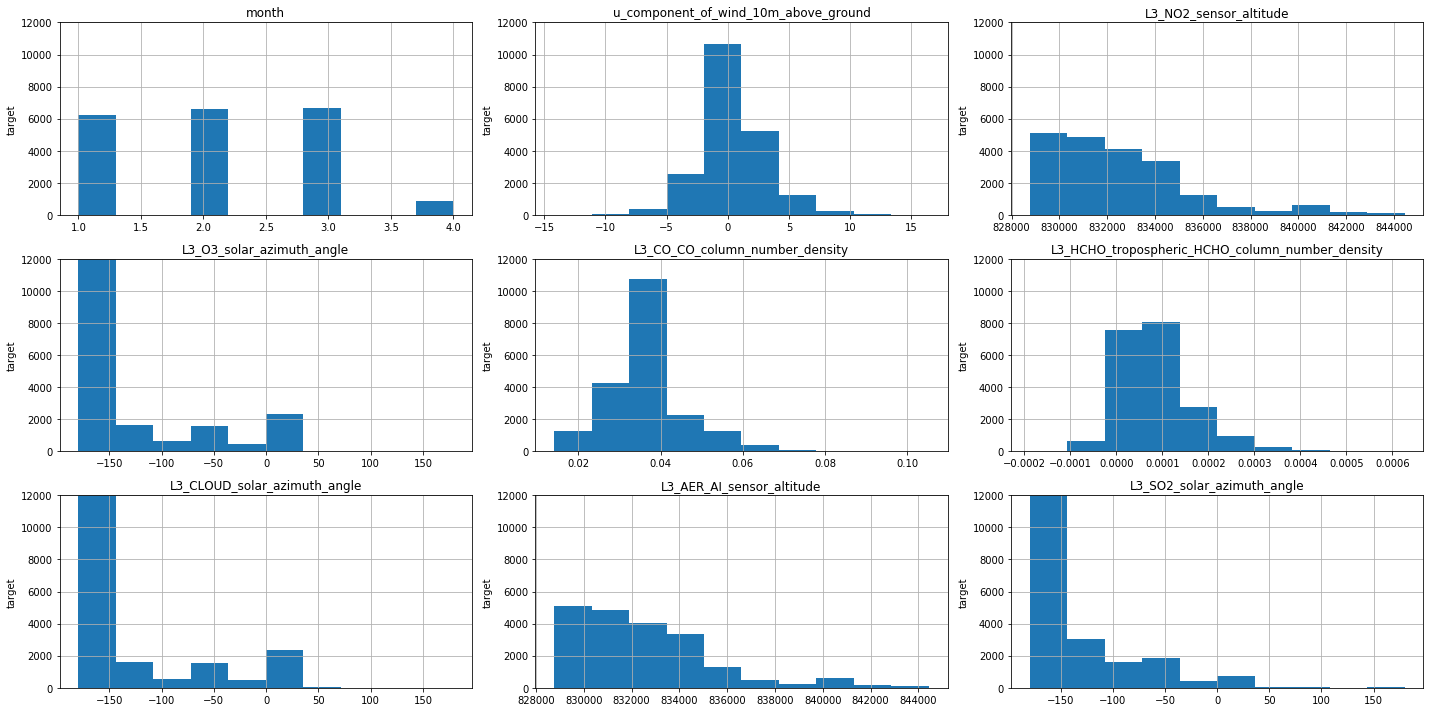

In [49]:
draw_histograms(df, df[predictors], 3, 3) # 8 variables, so 3 rows x 3 columns

It looks like most variables are positively skewed, with the wind component and tropospheric HCHO column density looking like normal distributions. If I choose to use PCA to reduce the dimensionality of the data, I will need to apply log transformations to make the data that follow log-normal distributions normal beforehand.

Lets read in the test data and perform the same transformations to that dataframe

In [50]:
test = pd.read_csv('Test.csv')

In [51]:
# Remove CH4 columns
test = test.drop([ 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1)

In [52]:
test

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.872276,-94.015418,14.140820,0.018736,944.341413,1281.892115,834751.987268,73.861680,56.019838,-94.001436,14.143972,0.000006,0.007113,75.552445,55.872276,-94.015418,14.140820,0.000042,1.680458,5188.524088,61477.291929,0.007849,6.415458,5797.742161,57757.842218,75

In [53]:
temp = test[['Place_ID X Date','Date','Place_ID']]
test.replace(0, np.nan, inplace=True)
test = test.groupby("Place_ID").transform(lambda x: x.fillna(x.mean()))
test = pd.concat([temp, test], axis=1)

In [54]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_SO2_solar_zenith_angle                 0
L3_CO_CO_column_number_density            0
L3_NO2_NO2_slant_column_number_density    0
L3_NO2_absorbing_aerosol_index            0
L3_NO2_cloud_fraction                     0
L3_NO2_sensor_altitude                    0
L3_NO2_sensor_azimuth_angle               0
L3_NO2_sensor_zenith_angle                0
L3_NO2_solar_azimuth_angle                0
L3_NO2_solar_zenith_angle                 0
dtype: int64


In [55]:
test['Place_ID_Group'] = test.Place_ID.str[0]
test = test.replace({"Place_ID_Group": id_dict})

In [56]:
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(test['Place_ID'])
test = test.join(count_encoded.add_suffix("_count"))
test

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Place_ID_Group,Place_ID_count
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,1.835919e-04,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,0,94
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,1.353507e-05,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,0,94
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.872276,-94.015418,14.140820,0.018736,944.341413,1281.892115,834751.987268,73.861680,56.019838,-94.001436,14.143972,0.000006,0.007113,75.552445,55.872276,-94.015418,14.140820,0.000042,1.680458,5188.524088,61477.2919

In [57]:
test['Date'] = test['Date'].astype('datetime64')
test['month'] = test['Date'].dt.month
test['day'] = test['Date'].dt.day
test['dow'] = test['Date'].apply(lambda x: x.weekday())

In [58]:
test['is_wknd'] = test['dow'].apply(lambda x: 1 if x >= 5 else 0)

In [59]:
cols = test.columns.tolist()
cols = cols[:3] + cols[-6:] + cols[3:-6]
test = test[cols]
display(test)

,Place_ID X Date,Date,Place_ID,Place_ID_Group,Place_ID_count,month,day,dow,is_wknd,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,0,94,1,2,3,0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,1.835919e-04,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,0,94,1,3,4,0,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,1.353507e-05,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,0,94,1,4,5,1,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.872276,-94.015418,14.140820,0.018736,944.341413,1281.892115,834751.987268,73.861680,56.019838,-94.001436,14.143972,0.000006,0.007113,75.552445,55.872276,-94.015418

In [60]:
# Export to csv
df.to_csv('Train_Processed.csv',index=False)
test.to_csv('Test_Processed.csv',index=False)